In [1]:
import pandas as pd 
from importlib.resources import path
import re
import pprint
import os
from numpy import size
path="/home/longin/dissertation/dataset/Data"
os.chdir(path)


In [2]:
## function for reading txt data.
def readfile(file_path):

    fileObject = open(file_path, 'r',encoding='cp1250')
    data = fileObject.read()
    portern='Respondent(.+)'
    result=re.findall(portern,data)
    # comvert list to string 
    dataset=' '.join(str(item) for item in result)
    return dataset




In [3]:
# iterate through all file
dataset=""
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        file_name = os.path.basename(file_path)
        #print(os.path.splitext(file_name)[0])
        transcritdata=readfile(file_path)
        dataset=dataset+transcritdata

# data cleaning 
removing uneccesary charactors lile "": and () even reading spaces


In [5]:
def datasetclening(text):
    """
        This function is removing unnecessary characters  
    """
    Char_repacede_by_space = re.compile(':') # charactor replaces by space
    Char_prathesis = re.compile('[()]') # charactor replaces by space
    remove_readinf_space=re.compile('\s\s+') # removing reading space
    text = text.lower() # lowercase text
    text = Char_repacede_by_space.sub(' ', text)# remove spacial charactors
    text = Char_prathesis.sub(' ', text)# remove prathesis 
    text= remove_readinf_space.sub('', text) # removing reading space
    #text.lstrip() # remove reading space
    

    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [6]:
dataset= datasetclening(dataset)
#dataset

# txt sumarization 

In [7]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [8]:
# making list of stop words
stop_words=list(STOP_WORDS)


In [9]:
# create  NLP module
nlp=spacy.load("en_core_web_sm")
# tokinize word in document
doc=nlp(dataset)
tokens=[token.text for token in doc]


In [10]:
# adding new line into puctuation list
punctuation=punctuation+"\n"
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [11]:
word_frequencies={}
for word in doc:
    if word.text.lower() not in stop_words:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text]=1
            else:
                word_frequencies[word.text]+=1

In [12]:
# get maximum word frequencies
max_frequency=max(word_frequencies.values())
print(max_frequency)


593


In [13]:
for word in word_frequencies:
    if word_frequencies[word]==381:
        print(word)

ppp


In [14]:
del word_frequencies['think']

In [15]:
# standarizing frequencies 
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

In [16]:
# sentence tokinization
from textblob import Sentence
Sentence_tokens=[sent for sent in doc.sents]



In [19]:
# sentence score
Sentence_scores={}
for sent in Sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in Sentence_scores.keys():
                Sentence_scores[sent]=word_frequencies[word.text.lower()]
            else:
                Sentence_scores[sent] +=word_frequencies[word.text.lower()]
                


In [20]:
# geting 0.3 percent of sentense with maximun score
from heapq import nlargest
select_length=int(len(Sentence_tokens)*0.001)
select_length

2

In [21]:
summary=nlargest(select_length,Sentence_scores,key=Sentence_scores.get)


In [22]:
# making into one string
final_summury=[word.text for word in summary]
summary= ' '.join(final_summury)
summary

'but it was maturing together a project which the government of rwanda would have induced for partnership.teams from moh, rbc and rdbchai come in not as a negotiator, come in to help and go in depth into the partnership and it has accompanied efforts at the feasibility lever in terms of financing, facilitation and it has never been involved into negotiation.no, we were still at the feasibility study level, so before it is completed, there is nothing else that could be done.with attitude of happiness , yes of course i am the onewith sureness attitude , yes of course you know new initiatives, do not go as smooth as you expect, many people saw into the ppp process, a kind of giving, to one partner the whole procurement of the whole process which is not always welcomed by everyone, so that is a hump already into the negotiation or the contracting of any partner, and i think if things are not well explained far before it might also be a hampering point or a sticking point at any contracting

In [23]:
print(len(dataset))
print(len(summary))

353718
3680


# Creating puting Question and Answers into dataFrame for better Analysis 

In [24]:
def createDataFrame(path):
    
    Questionsfull=[]
    responsesfull=[]
    QuestionsNumberfull=[]
    TranscodeListfull=[]
    for file in os.listdir():
    
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            # call read text file function
            fileObject = open(file_path, 'r',encoding='cp1250')
            data = fileObject.read()
            porternQ='Interviewer(.+)'
            porternA='Respondent(.+)'
            Questions=re.findall(porternQ,data)
            responses=re.findall(porternA,data)
            QuestionsNumber=list(range(1,len(Questions)+1))
            # comvert list to string 
            file_name = os.path.basename(file_path)
            # file name without extension
            Transcode=os.path.splitext(file_name)[0]
            # creating a list of single transcipt code 
            TranscodeList=[Transcode]*len(Questions)

            Questionsfull.extend(Questions)
            responsesfull.extend(responses)
            QuestionsNumberfull.extend(QuestionsNumber)
            TranscodeListfull.extend(TranscodeList)
            ## comvert transcripts into python pandas
    df = pd.DataFrame(list(zip(Questionsfull, responsesfull,QuestionsNumberfull,TranscodeListfull)),
    columns =['Questions', 'Responses','Question number','Transcripts'])
    return df
            

In [25]:
df=createDataFrame(path)
dataset=df
df['Questions']=df['Questions'].apply(datasetclening)
df['Responses']=df['Responses'].apply(datasetclening)
df['Transcripts']=df['Transcripts'].apply(datasetclening)


# Creating  a document base on Answers 



In [26]:
QuestionN=list(df['Question number'])

QuestionN=list(set(QuestionN))
AllAnser=[]
for i in QuestionN:
    df_Answer=df[df['Question number']==i]
    ## convert into list 
    List_answer=list(df_Answer['Responses'])
    anser=''.join(str(item) for item in List_answer)
    AllAnser.append(anser)
    
df = pd.DataFrame(list(zip(QuestionN, AllAnser)),columns =['Question number', 'Responses'])



# Topic modeling 

In [27]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [28]:
## cleaning dataset
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [29]:
#Apply data cleaning of responses
df['Responses'] = df['Responses'].apply(clean_text)
# knowing size for each Gorup of responses 
df['Num_words_text'] = df['Responses'].apply(lambda x:len(str(x).split())) 
## removing Questions that have very short Ansener
df.drop(df[df.Num_words_text < 20].index, inplace=True)
df_w2vec=df



In [30]:
# removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text
# remove stopwords from the text
df['Responses']=df['Responses'].apply(remove_stopwords)

In [31]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
## apply lemmatizition means finding smllar word like names and Adjectives 
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [32]:
response_list=df['Responses'].tolist()
print(response_list[1])
tokenized_response = lemmatization(response_list)
print('=======================================')
print(tokenized_response[1])  

heard chai came project expand considered rwanda recall heard meant help government partner specific partner multiple services related diagnostics make sure government delivers standard required quality health nationally internationallymy employer abbott heard read involved ahdpi director general district hospital role leader district hospital laboratory like general hospital supervise health centers basic diagnostic laboratory tests take part oversee health activities area including laboratories primary level secondary levelthank role first medical doctor human genetics director allied health services chuk addition work laboratory laboratory investigation addition position department clinical biology involved training overlap especially related courses return laboratory faculty medicinethen understandyes talked peripheral laboratories make satellite laboratories reference national reference look improved transportation peripheral laboratories satellites whereby need someone gisenyi sa

In [33]:
# Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(tokenized_response)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_response]

In [34]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [35]:
# printing topics
lda_model.print_topics()

[(0,
  '0.028*"private" + 0.023*"government" + 0.020*"service" + 0.018*"project" + 0.014*"sector" + 0.011*"health" + 0.009*"different" + 0.009*"public" + 0.009*"model" + 0.009*"hospital"'),
 (1,
  '0.019*"private" + 0.019*"sector" + 0.017*"people" + 0.016*"government" + 0.013*"service" + 0.011*"partner" + 0.011*"good" + 0.011*"health" + 0.010*"project" + 0.010*"different"'),
 (2,
  '0.022*"government" + 0.018*"private" + 0.018*"service" + 0.016*"people" + 0.014*"level" + 0.013*"hospital" + 0.013*"health" + 0.011*"sector" + 0.011*"time" + 0.010*"laboratory"'),
 (3,
  '0.028*"laboratory" + 0.022*"health" + 0.015*"hospital" + 0.012*"level" + 0.011*"government" + 0.010*"people" + 0.010*"area" + 0.008*"public" + 0.008*"sector" + 0.008*"platform"'),
 (4,
  '0.011*"part" + 0.011*"sector" + 0.011*"government" + 0.009*"project" + 0.009*"problem" + 0.009*"study" + 0.009*"chai" + 0.009*"business" + 0.009*"manager" + 0.009*"department"'),
 (5,
  '0.020*"private" + 0.019*"government" + 0.013*"partn

In [36]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's do

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.077837  0.009473       1        1  33.988714
0     -0.070022 -0.020125       2        1  15.900299
1     -0.069145 -0.013395       3        1  12.574736
5     -0.052943 -0.006154       4        1  10.890955
6     -0.059207  0.014666       5        1  10.782645
9     -0.004647  0.029597       6        1   5.566056
3      0.109089  0.140392       7        1   4.767766
7      0.019116  0.004420       8        1   3.033786
8      0.105938 -0.077204       9        1   1.301649
4      0.099657 -0.081670      10        1   1.193394, topic_info=              Term        Freq       Total Category  logprob  loglift
82          health  164.000000  164.000000  Default  30.0000  30.0000
78      government  258.000000  258.000000  Default  29.0000  29.0000
102     laboratory  116.000000  116.000000  Default  28.0000  28.0000
177        project  141.000000  141.000000  Default  27.0000  27.0000
201         sector  155.000000  155.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
42         country    0.953461   80.254711  Topic10  -5.1516  -0.0045
237           time    0.953453  109.200434  Topic10  -5.1516  -0.3125
311         market    0.499416   22.543983  Topic10  -5.7983   0.6186
142   organization    0.499415   16.482836  Topic10  -5.7983   0.9317
374  collaboration    0.499415   10.419057  Topic10  -5.7983   1.3904

[739 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
535       3  0.354456    abbot
535       8  0.354456    abbot
535       9  0.354456    abbot
536       3  0.714739  ability
536       8  0.119123  ability
...     ...       ...      ...
257       6  0.152500     year
257       7  0.108929     year
257       8  0.043571     year
724       1  0.185944        ™
724       2  0.743775        ™

[1561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 6, 7, 10, 4, 8, 9, 5])

In [37]:
## verfy thr quality of model
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_response, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.207869089468448

Coherence Score:  0.26349451614816866


this is bad model becouse Perplexity is still very high and coherence very low

In [40]:
## optimizing model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [41]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, 
texts=tokenized_response, start=2, limit=50, step=1)


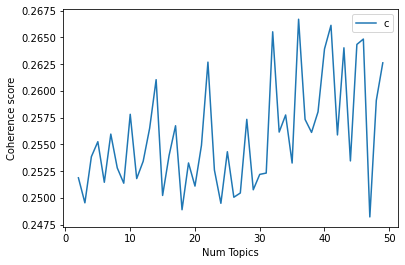

In [45]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [46]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2519
Num Topics = 3  has Coherence Value of 0.2495
Num Topics = 4  has Coherence Value of 0.2538
Num Topics = 5  has Coherence Value of 0.2552
Num Topics = 6  has Coherence Value of 0.2515
Num Topics = 7  has Coherence Value of 0.256
Num Topics = 8  has Coherence Value of 0.2528
Num Topics = 9  has Coherence Value of 0.2514
Num Topics = 10  has Coherence Value of 0.2578
Num Topics = 11  has Coherence Value of 0.2518
Num Topics = 12  has Coherence Value of 0.2534
Num Topics = 13  has Coherence Value of 0.2565
Num Topics = 14  has Coherence Value of 0.261
Num Topics = 15  has Coherence Value of 0.2502
Num Topics = 16  has Coherence Value of 0.254
Num Topics = 17  has Coherence Value of 0.2567
Num Topics = 18  has Coherence Value of 0.2489
Num Topics = 19  has Coherence Value of 0.2533
Num Topics = 20  has Coherence Value of 0.2511
Num Topics = 21  has Coherence Value of 0.2549
Num Topics = 22  has Coherence Value of 0.2627
Num Topics = 23  has Coh

In [47]:
# Select the model and print the topics
optimal_model = model_list[37]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(18,
  '0.013*"term" + 0.011*"country" + 0.010*"time" + 0.009*"good" + 0.009*"service" + 0.008*"health" + 0.007*"level" + 0.006*"work" + 0.006*"process" + 0.006*"hospital"'),
 (10,
  '0.027*"government" + 0.023*"private" + 0.015*"sector" + 0.015*"service" + 0.015*"hospital" + 0.014*"health" + 0.012*"project" + 0.012*"thing" + 0.012*"investment" + 0.011*"laboratory"'),
 (11,
  '0.014*"project" + 0.013*"partner" + 0.013*"country" + 0.012*"health" + 0.011*"obligation" + 0.011*"technical" + 0.010*"private" + 0.010*"thing" + 0.009*"information" + 0.009*"level"'),
 (20,
  '0.020*"people" + 0.020*"government" + 0.017*"service" + 0.016*"private" + 0.014*"hospital" + 0.014*"level" + 0.013*"health" + 0.012*"sector" + 0.011*"laboratory" + 0.009*"public"'),
 (33,
  '0.022*"government" + 0.021*"private" + 0.018*"service" + 0.016*"laboratory" + 0.014*"sector" + 0.013*"health" + 0.012*"people" + 0.011*"good" + 0.011*"thing" + 0.010*"project"'),
 (23,
  '0.010*"private" + 0.008*"people" + 0.008*"hosp

In [48]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's do

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.057799  0.015926       1        1  26.292939
8     -0.055010  0.021626       2        1  11.794848
2     -0.057223 -0.009158       3        1  10.668862
10    -0.062337  0.008351       4        1   8.921583
7     -0.055619  0.010727       5        1   6.976061
26    -0.048090  0.008567       6        1   4.360902
9     -0.046556  0.025926       7        1   3.823293
24    -0.041060  0.004276       8        1   3.367356
0     -0.051538 -0.008301       9        1   3.335763
32    -0.051542 -0.141150      10        1   3.209341
38    -0.042724  0.015226      11        1   2.476752
19    -0.048496 -0.005915      12        1   2.463162
16    -0.056861 -0.010037      13        1   1.667181
11     0.012488 -0.015223      14        1   1.274529
31    -0.015579 -0.065682      15        1   1.268479
33    -0.037909  0.006886      16        1   1.217233
27    -0.027358  0.013594      17        1   1.152706
29    -0.018037  0.011358      18        1   0.998152
21     0.002695  0.056143      19        1   0.956499
36     0.013854  0.056066      20        1   0.864374
37     0.024932 -0.045390      21        1   0.593985
28     0.002084 -0.000915      22        1   0.507037
30    -0.011431  0.007412      23        1   0.495682
35    -0.003341  0.017105      24        1   0.462383
34    -0.030714  0.015751      25        1   0.304193
17     0.041358  0.027539      26        1   0.296950
5     -0.000433  0.003135      27        1   0.080025
14    -0.037788 -0.001922      28        1   0.014144
3      0.008575 -0.011843      29        1   0.014144
4     -0.009051 -0.002690      30        1   0.014144
15     0.091119 -0.011161      31        1   0.014144
12     0.090795 -0.024861      32        1   0.014144
23     0.042711  0.007102      33        1   0.014144
22     0.029174  0.020666      34        1   0.014144
6      0.067711  0.009850      35        1   0.014144
1      0.152988 -0.001663      36        1   0.014144
18     0.063987  0.005199      37        1   0.014144
13     0.027867 -0.002068      38        1   0.014144
25     0.194161 -0.010450      39        1   0.014144, topic_info=            Term        Freq       Total Category  logprob  loglift
172      private  232.000000  232.000000  Default  30.0000  30.0000
78    government  274.000000  274.000000  Default  29.0000  29.0000
203      service  215.000000  215.000000  Default  28.0000  28.0000
155       people  202.000000  202.000000  Default  27.0000  27.0000
82        health  175.000000  175.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
888         okay    0.000970   13.538208  Topic39  -7.6070  -0.6801
191         rest    0.000970    7.762451  Topic39  -7.6072  -0.1241
150         part    0.000969   52.636107  Topic39  -7.6079  -2.0390
2001       sugar    0.000969    2.454524  Topic39  -7.6081   1.0264
225       system    0.000968   53.460293  Topic39  -7.6090  -2.0556

[2682 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
536       1  0.251886  ability
536       3  0.251886  ability
536       5  0.125943  ability
536       7  0.125943  ability
536      11  0.125943  ability
...     ...       ...      ...
257      17  0.022513     year
257      19  0.022513     year
257      20  0.022513     year
257      23  0.022513     year
257      26  0.022513     year

[3395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 9, 3, 11, 8, 27, 10, 25, 1, 33, 39, 20, 17, 12, 32, 34, 28, 30, 22, 37, 38, 29, 31, 36, 35, 18, 6, 15, 4, 5, 16, 13, 24, 23, 7, 2, 19, 14, 26])

# Word2vec Training

In [49]:
# pre-processing anad tokizine 
response_text = df_w2vec.Responses.apply(gensim.utils.simple_preprocess)
response_text

0     [attitude, happiness, head, biomedical, servic...
1     [heard, chai, came, project, expand, considere...
2     [attitude, shaking, head, contract, contract, ...
3     [sureness, attitude, rwanda, everything, provi...
4     [sureness, attitude, negotiation, anybody, par...
                            ...                        
72    [think, would, defer, investment, court, sure,...
74    [think, health, sensitive, sector, think, pred...
75    [would, based, findings, feasibility, study, i...
76    [think, would, informed, still, feasibility, s...
79    [yeah, actually, first, time, participate, any...
Name: Responses, Length: 77, dtype: object

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [50]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

# Build Vocabulary

In [51]:
model.build_vocab(response_text, progress_per=1000)

Train the Word2Vec Model

In [52]:
model.train(response_text, total_examples=model.corpus_count, epochs=model.epochs)

(103731, 128355)

In [53]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [54]:
model.wv.most_similar("test")

[('first', 0.9998217821121216),
 ('good', 0.9998144507408142),
 ('like', 0.9998141527175903),
 ('know', 0.9998133778572083),
 ('take', 0.9998090267181396),
 ('work', 0.9998080730438232),
 ('many', 0.999807596206665),
 ('also', 0.9998062252998352),
 ('thats', 0.9998053908348083),
 ('different', 0.9998013377189636)]

# similarity 

In [55]:
dataset['Transcripts'].tail(20)


733    rwa-int-pe_2022_2_1
734    rwa-int-pe_2022_2_1
735    rwa-int-pe_2022_2_1
736    rwa-int-pe_2022_2_1
737    rwa-int-pe_2022_2_1
738    rwa-int-pe_2022_2_1
739    rwa-int-pe_2022_2_1
740    rwa-int-pe_2022_2_1
741    rwa-int-pe_2022_2_1
742    rwa-int-pe_2022_2_1
743    rwa-int-pe_2022_2_1
744    rwa-int-pe_2022_2_1
745    rwa-int-pe_2022_2_1
746    rwa-int-pe_2022_2_1
747    rwa-int-pe_2022_2_1
748    rwa-int-pe_2022_2_1
749    rwa-int-pe_2022_2_1
750    rwa-int-pe_2022_2_1
751    rwa-int-pe_2022_2_1
752    rwa-int-pe_2022_2_1
Name: Transcripts, dtype: object

In [56]:

target_sentence = dataset[(dataset['Transcripts']=='rwa-int-pe-2021-10-26-fi' )& (dataset['Question number']==5)]
target_sentence=str(target_sentence.Responses)
sentences = dataset[(dataset['Transcripts']=='rwa-int-pe_2022_2_1' )& (dataset['Question number']==5)]
sentences=str(sentences.Responses)

In [57]:
w2v_vocab = set(model.wv.index_to_key)
# use n_similarity to compute a cosine similarity (should be reasonably robust)

# Show the target phrase and the most-similar target phrases


In [58]:
#sentences_similarity = np.zeros(len(sentences))

target_sentence_words = [w for w in target_sentence.split() if w in w2v_vocab]

sentence_words = [w for w in sentences.split() if w in w2v_vocab]
sim = model.wv.n_similarity(target_sentence_words, sentence_words)
sim   

0.9995056